# Projeto de Engenharia de Dados

## Gráficos Relevantes:
1. Valor médio, valor máximo e desvio padrão da idade (bar chart)
2. Porcentagem de celulares rooteados (bar chart)
3. Logins por dia da semana (pie chart)
4. Logins por timestamp (plot)
5. Média de logins por dia (plot)
6. Aparelhos por conta em moda, média, mediana e desvio padrão (bar chart)
7. Valor médio de reinicializações (bar chart)

## Insights para o Projeto:
1. Será que dispositivos com mais contas por wallpapers tem associação com account takeover?
2. O tempo que um dispositivo passa sem reiniciar tem alguma correlação com o evento de account takeover?

## Importando bibliotecas e scripts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import processamento

## Lendo os Dados

In [2]:
logins = processamento.reading_loginsset('csv')

   Unnamed: 0            id        account_id         device_id  \
0           0  7.997403e+11  YgXAhVgdDLsozwto  fGb574abkmDJTQ6M   
1           1  7.997403e+11  bO+gPxgfZG9sXtCb  Xll03k9l/OL2r6LM   
2           2  7.997403e+11  9mEBGcdz+RLzRNB4  qoKjqPhxqyALMsQ5   
3           3  7.997403e+11  tghz/Mlz069esl03  5fqsAP5QUp1M3PLC   
4           4  7.997403e+11  9mEBGcdz+RLzRNB4  qoKjqPhxqyALMsQ5   

    installation_id     timestamp  is_from_official_store  is_emulator  \
0  Uv9PEQZEwsW8nLOj  1.621290e+12                     1.0          0.0   
1  pR7skP90RuM3oqhK  1.620309e+12                     1.0          0.0   
2  hzKrODiR6F0jG4rH  1.625228e+12                     1.0          0.0   
3  krWwUuXbmBEP9g38  1.624645e+12                     1.0          0.0   
4  hzKrODiR6F0jG4rH  1.619907e+12                     1.0          0.0   

   has_fake_location_app  has_fake_location_enabled  probable_root  \
0                    0.0                        0.0            0.0   
1           

## Tratando os Dados (Preprocessamento)

In [3]:
# Excluindo linhas onde há nulos
logins = processamento.dropping_nas(logins)

# Transformando booleanos pela legibilidade
logins = processamento.transform_bool(logins)

# Gerando as novas colunas para a analise
logins = processamento.create_new_columns(logins)

## Gerando Gráficos

1. Média, Mediana e Desvio Padrão das Idades de Celular

<BarContainer object of 3 artists>

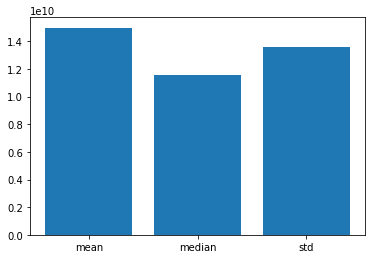

In [4]:
device_age_data = np.array([logins['device_age_ms'].mean(),
                            logins['device_age_ms'].median(),
                            logins['device_age_ms'].std()])

plt.figure()
plt.bar(['mean', 'median', 'std'], device_age_data)

2. Dia mais acessado

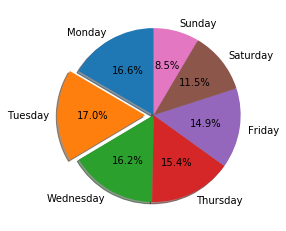

In [14]:
date = (logins['timestamp']/86400000).values.astype(dtype='datetime64[D]')
dayNumber = pd.Series(date , copy=False).dt.dayofweek
x_label = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday' , 'Sunday']
y_label = []
for i in range(0 , 7):
    y_label.append(dayNumber[dayNumber == i].count() )
pie_chart = plt.subplot()
pie_chart.pie(y_label , labels = x_label , explode = (0, 0.1, 0, 0 , 0 , 0 , 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()